Digite el número de bits por segundo: 300
Digite el ancho de banda (en Hz): 3000
Digite el caracter que desea transmitir: b
Binario:  01100010
Primer armónico:  37.5  Hz
Número armónicos:  80


<IPython.core.display.Javascript object>


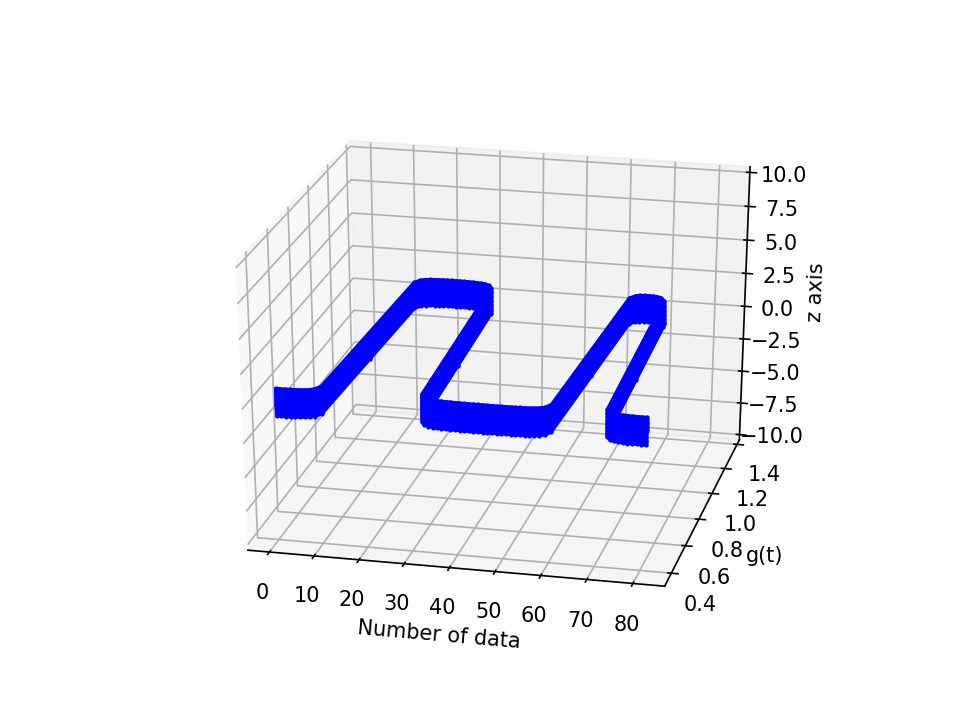

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import scipy.integrate as integrate
import math

%matplotlib notebook

BYTE = 8

bps = int(input('Digite el número de bits por segundo: '))
bandwidth = int(input('Digite el ancho de banda (en Hz): '))
caracter = input('Digite el caracter que desea transmitir: ')

value_ascii = ord(caracter)
binary = format(value_ascii, '08b')

time = BYTE/bps
f = 1/BYTE

first_harmonic = float(bps / BYTE)
number_harmonics = int(bandwidth / first_harmonic)

print ('Binario: ', binary)
print ('Primer armónico: ', first_harmonic, ' Hz')
print ('Número armónicos: ', number_harmonics)


ti = 0 #revisar cómo calcularlo
tf = 8 #revisar cómo calcularlo
increment = 0.1 #revisar cómo calcularlo


def an(n):
    sumIntegral = 0
    for i in range(8):
        if(binary[i] == '1'):
            ans, err = integrate.quad(lambda t: math.sin(2*math.pi*n*f*t), i, i+1)
            #print('integrando de ',i,' hasta ',i+1)
            sumIntegral += (2/8)*ans
    return sumIntegral
    
#print(an(1))


def bn(n):
    sumIntegral = 0
    for i in range(8):
        if(binary[i] == '1'):
            ans, err = integrate.quad(lambda t: math.cos(2*math.pi*n*f*t), i, i+1)
            sumIntegral += (2/8)*ans
    return sumIntegral

#print(bn(1))


def cn(n):
    return math.sqrt( an(n)**2 + bn(n)**2 )

#print(cn(1))


def dc():
    sumIntegral = 0
    for i in range(8):
        if(binary[i] == '1'):
            ans, err = integrate.quad(lambda t: 1, i, i+1)
            sumIntegral += (2/8)*ans
    return sumIntegral

#print(dc())


def teta(n):
    return math.atan2( bn(n),an(n) ) 

#print(teta(1))


def g(t):
    sum = dc()
    for i in range(1,number_harmonics+1):
        sum += cn(i) * math.sin( 2*math.pi*i*f*t + teta(i) )
        #print(i)
    return sum

#print(g(0))


dataNumber = 0
x = []
y = []

i = ti
while (i <= tf):
    dataNumber += 1
    x.append(dataNumber)
    y.append( g(i) )
    i += 0.1

#print(dataNumber)

    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z = []

for i in range(len(x)):
    z.append(0)

#ax.scatter(x, y, z, c='b', marker='o', linewidths=1 )

ax.set_xlabel('Number of data')
ax.set_ylabel('g(t)')
ax.set_zlabel('z axis')

ax.set_zlim([-10,10])

#plt.plot(x, y, z, '-ok', markersize=1, color='blue',linestyle='solid')

accumulate = -1
while(accumulate<=1):
    plt.plot(x, y, accumulate, '-ok', markersize=1, color='blue')
    accumulate += 0.1

plt.show()